In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv("./input/german_credit_data.csv")
print (Data.columns)
Data.head(10)

Index([u'Unnamed: 0', u'Age', u'Sex', u'Job', u'Housing', u'Saving accounts',
       u'Checking account', u'Credit amount', u'Duration', u'Purpose'],
      dtype='object')


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [3]:
print("Purpose : ",Data.Purpose.unique())
print("Sex : ",Data.Sex.unique())
print("Housing : ",Data.Housing.unique())
print("Saving accounts : ",Data['Saving accounts'].unique())
print("Checking account : ",Data['Checking account'].unique())

('Purpose : ', array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object))
('Sex : ', array(['male', 'female'], dtype=object))
('Housing : ', array(['own', 'free', 'rent'], dtype=object))
('Saving accounts : ', array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object))
('Checking account : ', array(['little', 'moderate', nan, 'rich'], dtype=object))


In [4]:

Data['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":2,"quite rich":1 ,"rich":2 });
Data['Saving accounts'] = Data['Saving accounts'].fillna(Data['Saving accounts'].dropna().mean())

Data['Checking account'] = Data['Checking account'].map({"little":0,"moderate":1,"rich":2 });
Data['Checking account'] = Data['Checking account'].fillna(Data['Checking account'].dropna().mean())

Data['Sex'] = Data['Sex'].map({"male":0,"female":1}).astype(float);

Data['Housing'] = Data['Housing'].map({"own":0,"free":1,"rent":2}).astype(float);

Data['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

Data.head(10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,0.0,2,0.0,0.446756,0.000000,1169,6,0.0
1,1,22,1.0,2,0.0,0.000000,1.000000,5951,48,0.0
2,2,49,0.0,1,0.0,0.000000,0.651815,2096,12,1.0
3,3,45,0.0,2,1.0,0.000000,0.000000,7882,42,2.0
4,4,53,0.0,2,1.0,0.000000,0.000000,4870,24,3.0
5,5,35,0.0,1,1.0,0.446756,0.651815,9055,36,1.0
6,6,53,0.0,2,0.0,1.000000,0.651815,2835,24,2.0
7,7,35,0.0,3,2.0,0.000000,1.000000,6948,36,3.0
8,8,61,0.0,1,0.0,2.000000,0.651815,3059,12,0.0
9,9,28,0.0,3,0.0,0.000000,1.000000,5234,30,3.0


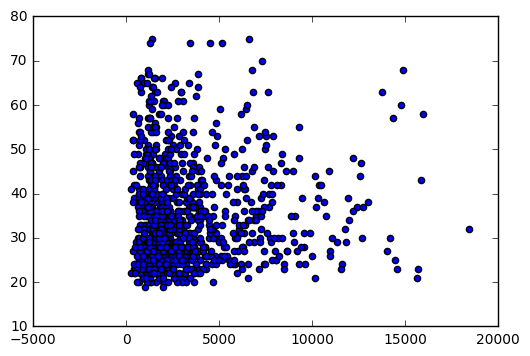

In [5]:
plt.scatter(Data['Credit amount'],Data["Age"])
plt.figure()

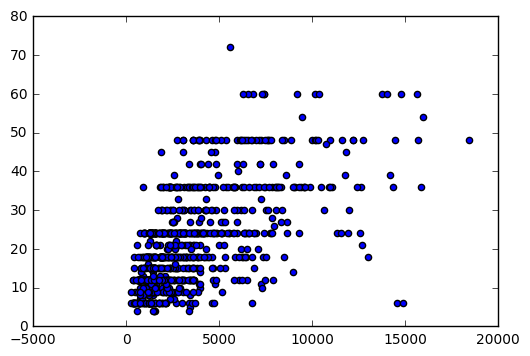

In [6]:
plt.scatter(Data['Credit amount'],Data["Duration"])
plt.figure()

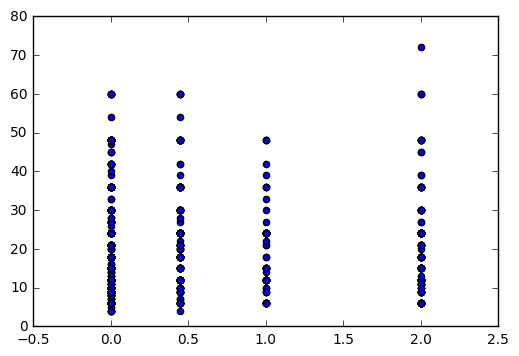

In [7]:
plt.scatter(Data['Saving accounts'],Data["Duration"])
plt.figure()

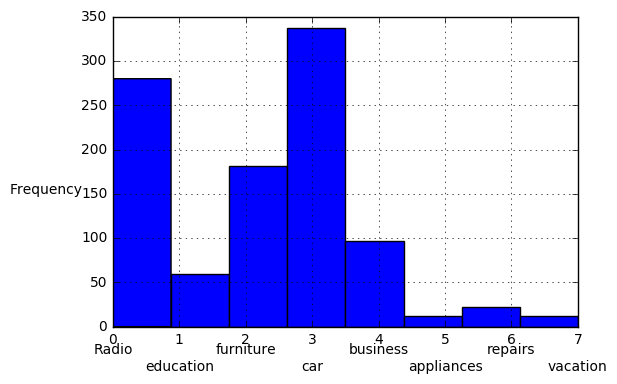

In [8]:
fig = Data["Purpose"].hist(bins=8)
fig.text(-1, 150, 'Frequency', ha='center')
fig.text(0, -30, 'Radio', ha='center')
fig.text(1, -50, 'education', ha='center')
fig.text(2, -30, 'furniture', ha='center')
fig.text(3, -50, 'car', ha='center')
fig.text(4, -30, 'business', ha='center')
fig.text(5, -50, 'appliances', ha='center')
fig.text(6, -30, 'repairs', ha='center')
fig.text(7, -50, 'vacation', ha='center')

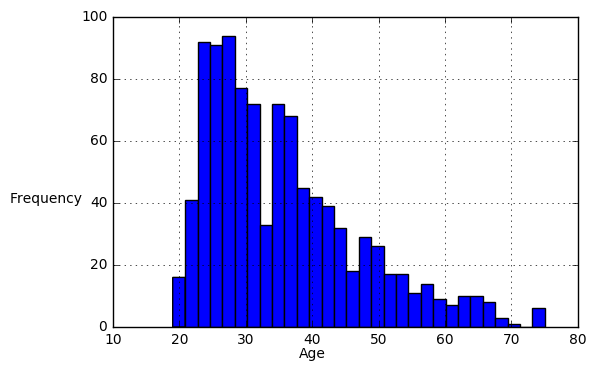

In [9]:
fig = Data.Age.hist(bins=30)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

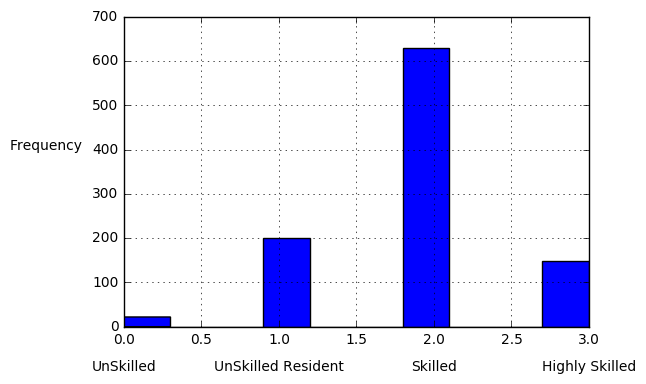

In [10]:
fig = Data["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

In [7]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(Data)
X_norm = normalize(Data);
y_PCA = PCA(n_components=2).fit_transform(X_norm,2);
y_PCA.shape

(1000, 2)

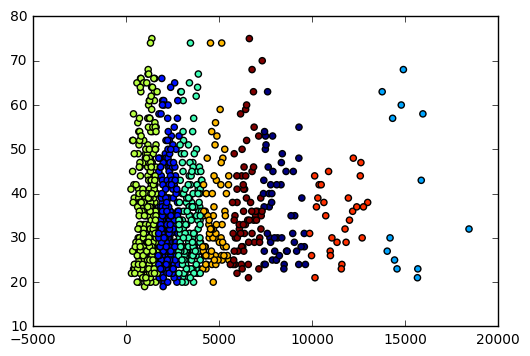

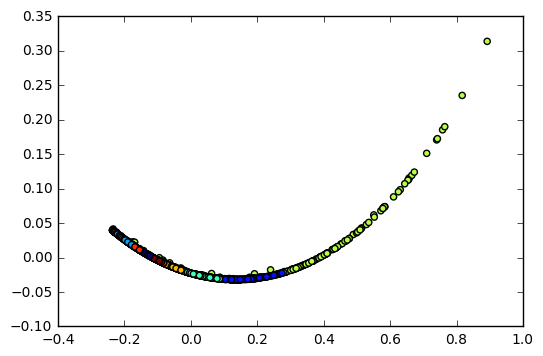

In [10]:
plt.scatter(Data['Credit amount'],Data['Age'],c=y)
plt.figure()
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)